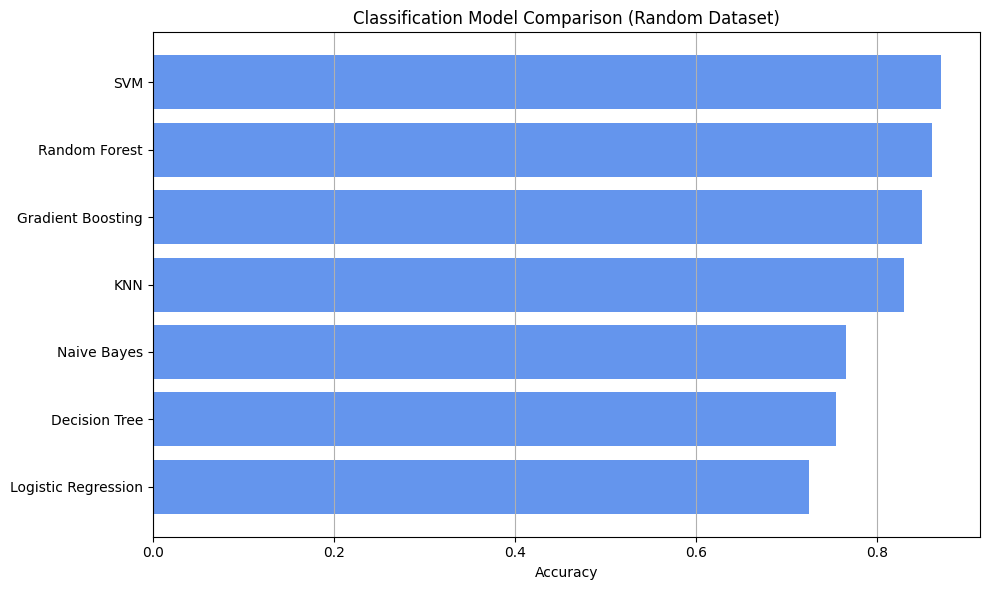

                 Model  Accuracy
5                  SVM     0.870
3        Random Forest     0.860
6    Gradient Boosting     0.850
1                  KNN     0.830
4          Naive Bayes     0.765
2        Decision Tree     0.755
0  Logistic Regression     0.725


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 데이터 생성
X, y = make_classification(n_samples=1000,     # 총 1000개의 샘플
                           n_features=10,      # 총 10개의 피처 (입력 변수)
                           n_informative=5,    # 유용한 피처 5개
                           n_redundant=2,      # 중복된 피처 2개
                           n_classes=3,        # 클래스 수: 3개의 카테고리
                           random_state=42)    # 재현성을 위한 시드값

# 데이터 분할: 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 분류 모델 정의 : 7개모델정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),   # 로지스틱 회귀
    "KNN": KNeighborsClassifier(),                              # K-최근접 이웃
    "Decision Tree": DecisionTreeClassifier(),                  # 결정 트리
    "Random Forest": RandomForestClassifier(),                  # 랜덤 포레스트
    "Naive Bayes": GaussianNB(),                                # 나이브 베이즈
    "SVM": SVC(),                                               # 서포트 벡터 머신
    "Gradient Boosting": GradientBoostingClassifier()           # 그래디언트 부스팅
}

# 모델 학습 -> 평가
results = []  
for name, model in models.items():
    model.fit(X_train_scaled, y_train)               # 모델 학습
    y_pred = model.predict(X_test_scaled)            # 테스트 데이터로 예측
    acc = accuracy_score(y_test, y_pred)             # 정확도 계산
    results.append({'Model': name, 'Accuracy': acc}) # 결과 저장

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='cornflowerblue')
plt.xlabel('Accuracy')
plt.title('Classification Model Comparison (Random Dataset)')
plt.gca().invert_yaxis()  # 정확도 높은 모델이 위에 오도록 반전
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(results_df)
